<a href="https://colab.research.google.com/github/tn-220/SIC-Machine-Learning/blob/main/SIC_ML_Coding_Exercises/SIC_ML_Chapter_05_Coding_Exercises/ex_0403.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Exercise #0403

### 1. Compare clustering algorithms:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering   # merge items into clusters based on distance/similarity
from sklearn.cluster import DBSCAN      # Density-based spatial clustering of applications with noise: given a set of points in some space, it groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions
"""
Single Linkage: Merge two groups A and B based on their closest pair
Ward's Method: Merge the pair of clusters that minimizes the total within-group error (sum of squares) between each document and centroid
dendrogram: a diagram representing a tree. in hierarchical clustering, it illustrates the arrangement of the clusters produced by the corresponding analyses
fcluster: method forms flat clusters from the hierarchical clustering. It is defined by the given linkage matrix, identifying a link between clustered classes. 
"""
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

#### 1.1. Generate simulated data and visualize:

[0 1 1 0 0]


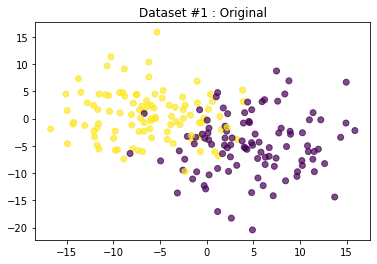

In [5]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

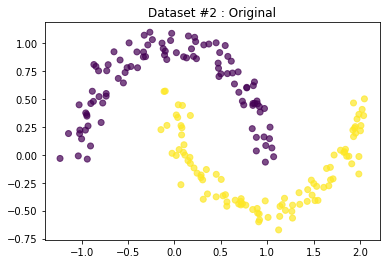

In [6]:
# Dataset #2.
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

#### 1.2. Apply k-means clustering and visualize:

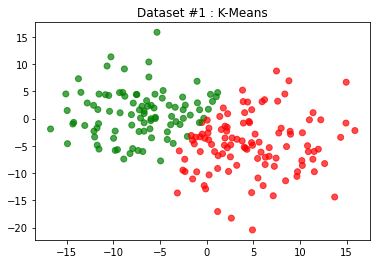

In [7]:
# Dataset #1 and two clusters.
kmeans = KMeans(n_clusters=2,random_state=123)                 # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X1)                                                 # Unsupervised learning => Only X1.    
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )    
plt.title('Dataset #1 : K-Means')
plt.show()

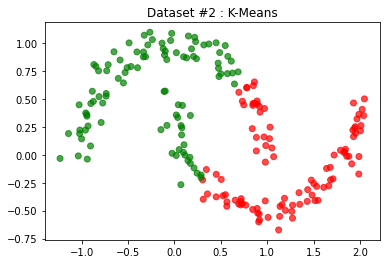

In [8]:
# Dataset #2 and two clusters.
kmeans = KMeans(n_clusters=2,random_state=123)                 # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X2)                                                 # Unsupervised learning => Only X1.    
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : K-Means')
plt.show()

#### 1.3. Apply agglomerative clustering and visualize:

AgglomerativeClustering(n_clusters=2, *, affinity='euclidean',..., linkage='ward', ...)


linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’

The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

* ‘ward’ minimizes the variance of the clusters being merged.

* ‘average’ uses the average of the distances of each observation of the two sets.

* ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

* ‘single’ uses the minimum of the distances between all observations of the two sets.

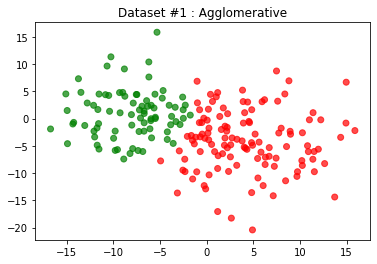

In [9]:
# Dataset #1 and two clusters.
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : Agglomerative')
plt.show()

<class 'sklearn.cluster._agglomerative.AgglomerativeClustering'>
<class 'numpy.ndarray'>
(200,)


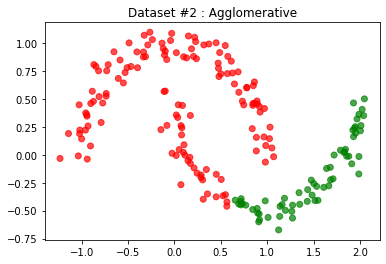

In [16]:
# Dataset #2 and two clusters.
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
print(type(agglo))
print(type(agglo.labels_))
print(np.shape(agglo.labels_))
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Agglomerative')
plt.show()

#### 1.4. Apply hierarchical clustering and visualize: 

<class 'numpy.ndarray'>
(199, 4)


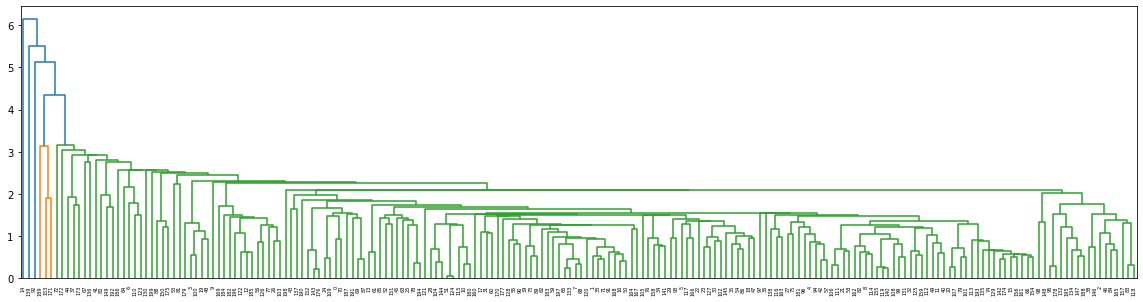

In [17]:
# Dataset #1 and show dendrogram.
myLinkage = linkage(X1,method='single')       # Cluster hierarchically using single linkage.
print(type(myLinkage))
print(np.shape(myLinkage))

# myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
# plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
# plt.title('Dataset #2 : Agglomerative')
# plt.show()
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [ ]:
# Dataset #1 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 5, criterion='distance')                      #  Cut at the height (distance) = 5 <= change this value at will.
pd.Series(labels).value_counts()

In [ ]:
# Dataset #2 and show dendrogram.
myLinkage = linkage(X2,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [ ]:
# Dataset #2 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 0.23, criterion='distance')                      #  Cut at the height (distance) = 0.23 <= change this value at will.
pd.Series(labels).value_counts()

In [ ]:
myColors = {1:'red',2:'green'}                                                # Define a color palette: 1~2.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Hierarchical')
plt.show()

#### 1.5. Apply DBSCAN and visualize: 

In [ ]:
# Dataset #1.
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X1)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1.  Red = -1 = outlier.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : DBSCAN')
plt.show()

In [ ]:
# Dataset #2.
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X2)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1. Red = -1 = outlier.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : DBSCAN')
plt.show()

NOTE: Let's discuss the result of the different clustering algorithms.